In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sp-500-stocks/sp500_stocks.csv
/kaggle/input/sp-500-stocks/sp500_companies.csv
/kaggle/input/sp-500-stocks/sp500_index.csv


In [2]:
df = pd.read_csv('../input/sp-500-stocks/sp500_stocks.csv', index_col='Date', parse_dates=True)
df

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2009-12-31,MMM,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,MMM,58.128868,83.019997,83.449997,82.669998,83.089996,3043700.0
2010-01-05,MMM,57.764767,82.500000,83.230003,81.699997,82.800003,2847000.0
2010-01-06,MMM,58.584003,83.669998,84.599998,83.510002,83.879997,5268500.0
2010-01-07,MMM,58.626015,83.730003,83.760002,82.120003,83.320000,4470100.0
...,...,...,...,...,...,...,...
2022-09-02,ZTS,156.979996,156.979996,161.720001,156.059998,160.699997,1529500.0
2022-09-06,ZTS,156.839996,156.839996,159.529999,156.220001,157.759995,1692000.0
2022-09-07,ZTS,160.399994,160.399994,160.830002,156.410004,157.199997,1506400.0


# GOOGLE

I start with GOOGLE stocks; Considering that the prices are daily, we should set freq to 'D'. After applying this, we will have a lot of NaN values in our data;

If you want to drop the Nan values, the freq value change to None again; So, the most logical option in this case is to fill the NaN values with their previous values.

In [3]:
goog_df = df[df['Symbol'] == 'GOOG']
goog_df = goog_df.asfreq('d')
goog_df = goog_df.fillna(method='ffill')
goog_df

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2009-12-31,GOOG,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01,GOOG,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,GOOG,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,GOOG,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,GOOG,15.610239,15.610239,15.678981,15.547723,15.615220,78541293.0
...,...,...,...,...,...,...,...
2022-09-05,GOOG,108.680000,108.680000,111.675003,108.129997,111.339996,20601600.0
2022-09-06,GOOG,107.480003,107.480003,108.879997,106.510002,108.135002,20565100.0
2022-09-07,GOOG,110.480003,110.480003,110.989998,107.614998,107.760002,22987200.0


Here, I decided to look at prices after 2020 only.

In [4]:
goog_df = goog_df[goog_df.index >= '2020-01-01']
goog_df

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-01,GOOG,66.850998,66.850998,66.900002,66.454247,66.505501,19236000.0
2020-01-02,GOOG,68.368500,68.368500,68.406998,67.077499,67.077499,28132000.0
2020-01-03,GOOG,68.032997,68.032997,68.625000,67.277199,67.392998,23728000.0
2020-01-04,GOOG,68.032997,68.032997,68.625000,67.277199,67.392998,23728000.0
2020-01-05,GOOG,68.032997,68.032997,68.625000,67.277199,67.392998,23728000.0
...,...,...,...,...,...,...,...
2022-09-05,GOOG,108.680000,108.680000,111.675003,108.129997,111.339996,20601600.0
2022-09-06,GOOG,107.480003,107.480003,108.879997,106.510002,108.135002,20565100.0
2022-09-07,GOOG,110.480003,110.480003,110.989998,107.614998,107.760002,22987200.0


In this notebook, we are going to use the Arima model to predict stock prices. When we want to use ARIMA, we need to know arima models require a stationary series; because the arima model looks at the past data to predict the future values.

One of the ways to determine whether a series is stationarity, is to use the 'adfuller' function. So I defining a function which get a column of data and return stationarity status. If the P-value of 'adfuller' function is less than 0.05, the column is stationarity, otherwise it is not

*note: Stationary time series is when the mean and variance are constant over time.*

In [5]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def stationarity(col):
    res = adfuller(col.dropna())
    print("Test Statistic:", res[0])
    print("P-Value:", res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

Test Statistic: -1.3366426205411155
P-Value: 0.6122460744496773
Non-Stationary


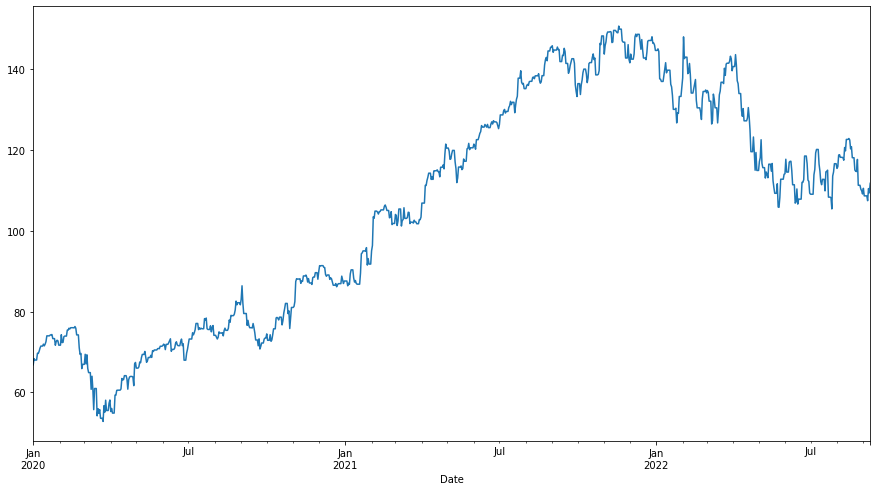

In [6]:
goog_df['Close'].plot(figsize=(15,8))

stationarity(goog_df['Close'])

As you can see, the Close column isn't stationarity.

**Classic ARIMA**

The ARIMA models combine two models and one method. These are;
* Auto Regression(AR) 
* Moving Average(MA) 
* Differencing for stationarity(I). 

These three works together when the time series we use is non-stationary. In simple words, we can call a model ARIMA model if we apply differencing(I) at least once to make the data stationary and combine autoregressive and moving averages to make some forecasting based on old time-series data.

A nonseasonal ARIMA model is classified as an "ARIMA(p,d,q)" model, where: p is the number of autoregressive terms(AR), d is the number of nonseasonal differences needed for stationarity(I), and q is the number of lagged forecast errors in the prediction equation(MA).

As mentioned, d refers to the number of differencing transformations required by the time series to get stationary. So we can use pandas 'diff()' function once or more and recall stationarity function to find the d-value.

Test Statistic: -14.925569100922083
P-Value: 1.3907731534504442e-27
Stationary


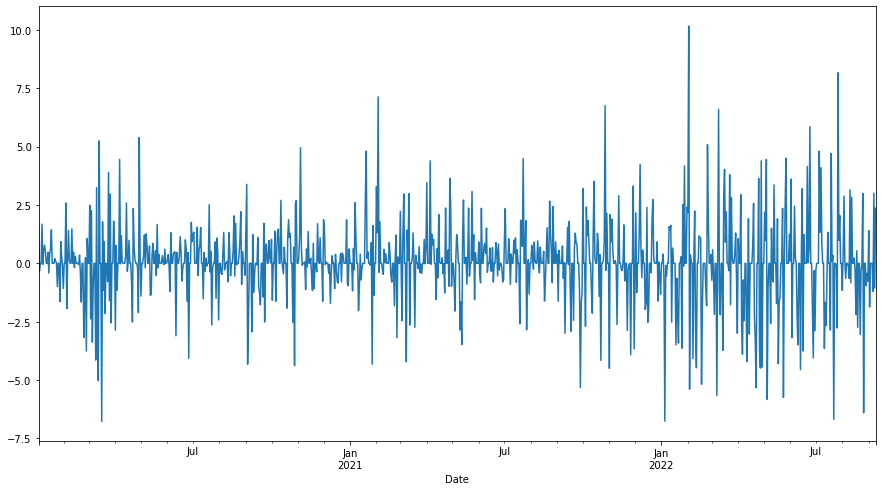

In [7]:
diff_1_close = goog_df['Close'].diff().dropna()
diff_1_close.plot(figsize=(15,8))

stationarity(diff_1_close)

As you can see, after differencing once for Close column we get stationarity status. So the d-value for our ARIMA model will equal to 1

One of the easiest and best methods to choose the value of P and Q from ARIMA model is:

* Draw a partial autocorrelation graph(PACF) of the data. This will help us in finding the value of P because the cut-off point to the PACF is P. In other words, the order of AR term is equal to the lags that can cross a significance limit.

* Draw an autocorrelation graph(ACF) of the data. This will help us in finding the value of q because the cut-off point to the ACF is q. In other words, the order of MA term is equal to the lags that can cross a significance limit.

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

def pacf(col):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
    ax1.plot(col)
    ax1.set_title('The Column Diff')
    plot_pacf(col, method='ywm', ax=ax2);
    

def acf(col):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
    ax1.plot(col)
    ax1.set_title('The Column Diff')
    plot_acf(col, ax=ax2);

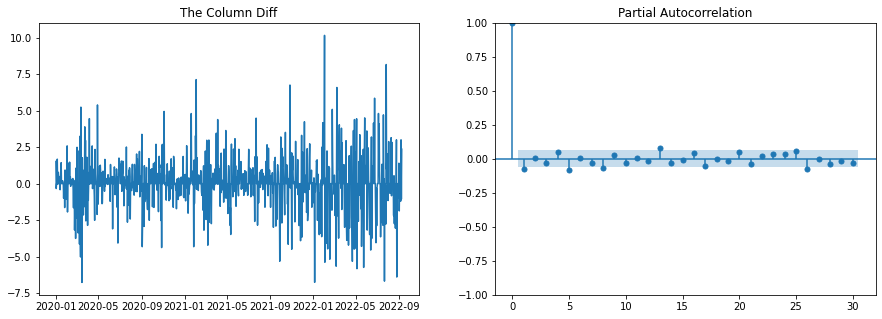

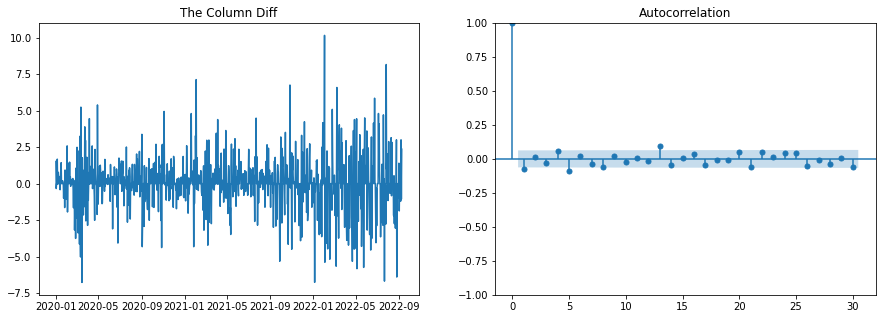

In [9]:
pacf(diff_1_close)
acf(diff_1_close)

It seems that the best value for P and Q is equal to zero. So, the best model we have found is ARIMA(0,1,0) and it's nothing but RANDOM WALK :)))

Anyway, let's go and train the model and plot the results

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


def arima_train_and_plot(data, col_name, Ntest, p, d, q):
    #split data to train and test sets based on N_test value
    train = data.iloc[:-Ntest]
    test = data.iloc[-Ntest:]
    train_idx = data.index <= train.index[-1]
    test_idx = data.index > train.index[-1]
    
    #Define and fit the arima model
    arima = ARIMA(train[col_name], order=(p,d,q))
    arima_res = arima.fit()
    
    #plot the real values of stock prices
    fig, ax= plt.subplots(figsize=(15,8))
    ax.plot(data[col_name], label='Actual return')
    
    #plot the fitted values of model (in sample data predicted values)
    train_pred = arima_res.fittedvalues
    ax.plot(train.index, train_pred, color='green', label='fitted')
    
    #plot the forecast values of model (out of sample data predicted values)
    prediction_res = arima_res.get_forecast(Ntest)
    conf_int = prediction_res.conf_int()
    #lower and upper limits of prediction 
    lower, upper = conf_int[conf_int.columns[0]], conf_int[conf_int.columns[1]]
    forecast = prediction_res.predicted_mean
    ax.plot(test.index, forecast, label='forecast')
    ax.fill_between(test.index, lower, upper, color='red', alpha=0.3)
    ax.legend()
    
    #evaluating the model using RMSE and MAE metrics
    y_true = test[col_name].values
    rmse = np.sqrt(mean_squared_error(y_true,forecast))
    mae = mean_absolute_error(y_true,forecast)
    
    return rmse, mae

Here, we want to forecast google stock prices for last 30 days using ARIMA(0,1,0)

Root Mean Squared Error:  8.006779477614902
Mean Absolute Error:  6.714333852132161


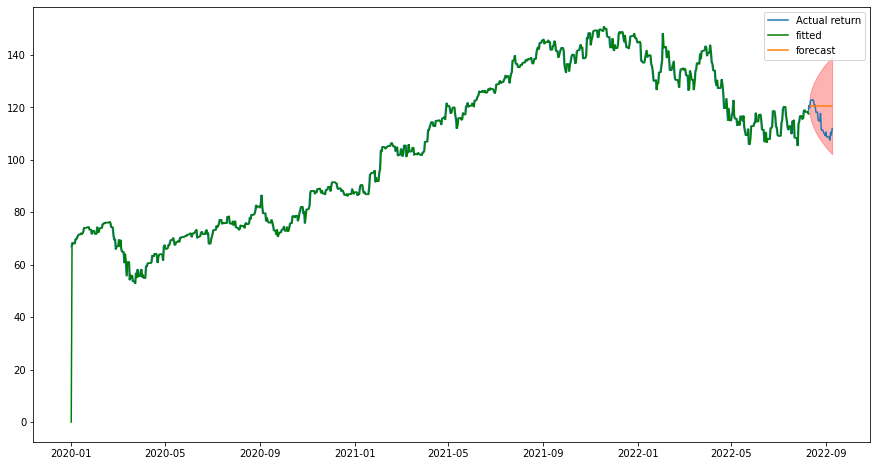

In [11]:
rmse, mae = arima_train_and_plot(goog_df, 'Close', Ntest=30, p=0, d=1, q=0)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

**Auto ARIMA**

Here, I want to use another library named 'pmdarima' for auto arima! That's an amazing library you can use to find the best model for time series forecastiog.

In [12]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.8 MB/s eta 0:00:0000:0100:010m


We can use 'ndiffs' function from pmdarima to find d-value of arima model

In [13]:
import pmdarima as pm
from pmdarima.arima.utils import ndiffs

d_val = ndiffs(goog_df['Close'], test='adf')
print('Arima D-value:', d_val)

Arima D-value: 1


Auto-arima behaves like sklearn gridsearchcv! after choosing d-value, we can set min and max values for P and Q and auto-arima tries to find best model uses this ranges. I set stepwise to False because the time parameter is not important for me now!

In [14]:
#splitting the data to train and test sets based on Ntest value
#last 30 days
Ntest = 30
train = goog_df.iloc[:-Ntest]
test = goog_df.iloc[-Ntest:]
train_idx = goog_df.index <= train.index[-1]
test_idx = goog_df.index > train.index[-1]

#Define auto-arima to find best model
model = pm.auto_arima(train['Close'],
                      d = d_val,
                      start_p = 0,
                      max_p = 15,
                      start_q = 0,
                      max_q = 15,
                      stepwise=False,
                      max_order=30,
                      trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=3746.390, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=3744.525, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=3746.523, Time=0.33 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=3747.819, Time=0.46 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=3748.343, Time=0.66 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=3741.263, Time=0.82 sec
 ARIMA(0,1,6)(0,0,0)[1] intercept   : AIC=3742.789, Time=0.74 sec
 ARIMA(0,1,7)(0,0,0)[1] intercept   : AIC=3741.496, Time=1.17 sec
 ARIMA(0,1,8)(0,0,0)[1] intercept   : AIC=3742.473, Time=1.16 sec
 ARIMA(0,1,9)(0,0,0)[1] intercept   : AIC=3744.463, Time=1.55 sec
 ARIMA(0,1,10)(0,0,0)[1] intercept   : AIC=3746.282, Time=1.71 sec
 ARIMA(0,1,11)(0,0,0)[1] intercept   : AIC=3748.278, Time=1.80 sec
 ARIMA(0,1,12)(0,0,0)[1] intercept   : AIC=3750.270, Time=2.39 sec
 ARIMA(0,1,13)(0,0,0)[1] intercept   : AIC=3742.066, Time=2.98 sec
 ARIMA(0,1,14)(0,0,0)[1] intercept   : AIC=3741.959, Time=3.19 sec
 ARIM

In [15]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (8, 1, 7),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 1),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [16]:
def plot_result(model, data, col_name, Ntest):
    
    params = model.get_params()
    d = params['order'][1]
    
    #In sample data prediction
    train_pred = model.predict_in_sample(start=d, end=-1)
    #out of sample prediction
    test_pred, conf = model.predict(n_periods=Ntest, return_conf_int=True)
    
    #plotting real values, fitted values and prediction values
    fig, ax= plt.subplots(figsize=(15,8))
    ax.plot(data[col_name].index, data[col_name], label='Actual Values')
    ax.plot(train.index[d:], train_pred, color='green', label='Fitted Values')
    ax.plot(test.index, test_pred, label='Forecast Values')
    ax.fill_between(test.index, conf[:,0], conf[:,1], color='red', alpha=0.3)
    ax.legend()
    
    #evaluating the model using RMSE and MAE metrics
    y_true = test[col_name].values
    rmse = np.sqrt(mean_squared_error(y_true,test_pred))
    mae = mean_absolute_error(y_true,test_pred)

    return rmse, mae

Root Mean Squared Error:  8.062888594728967
Mean Absolute Error:  6.871455152638741


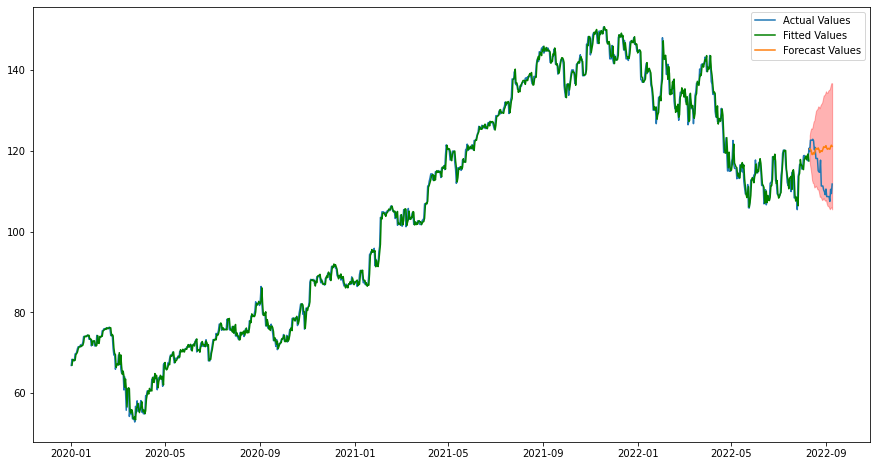

In [17]:
rmse , mae = plot_result(model, goog_df, 'Close', Ntest=30)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

If you compare the metrics result of classic arima and auto arima, you can see classic arima do its job a bit better than auto arima in this case!

**Classic ARIMA on Log of Prices(Close values)**

As you know, the stock price is often log-normally distributed. This is because extreme moves become less likely as the stock's price approaches zero. Here, I want to use log of close values and apply manually arima and auto-arima :)

In [18]:
goog_df['log Close'] = np.log(goog_df['Close'])
goog_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Symbol,Adj Close,Close,High,Low,Open,Volume,log Close
Date,,,,,,,,
2020-01-01,GOOG,66.850998,66.850998,66.900002,66.454247,66.505501,19236000.0,4.202466
2020-01-02,GOOG,68.368500,68.368500,68.406998,67.077499,67.077499,28132000.0,4.224912
2020-01-03,GOOG,68.032997,68.032997,68.625000,67.277199,67.392998,23728000.0,4.219993
2020-01-04,GOOG,68.032997,68.032997,68.625000,67.277199,67.392998,23728000.0,4.219993
2020-01-05,GOOG,68.032997,68.032997,68.625000,67.277199,67.392998,23728000.0,4.219993
...,...,...,...,...,...,...,...,...
2022-09-05,GOOG,108.680000,108.680000,111.675003,108.129997,111.339996,20601600.0,4.688408
2022-09-06,GOOG,107.480003,107.480003,108.879997,106.510002,108.135002,20565100.0,4.677305
2022-09-07,GOOG,110.480003,110.480003,110.989998,107.614998,107.760002,22987200.0,4.704835


Test Statistic: -1.298310101345664
P-Value: 0.6299450892914846
Non-Stationary


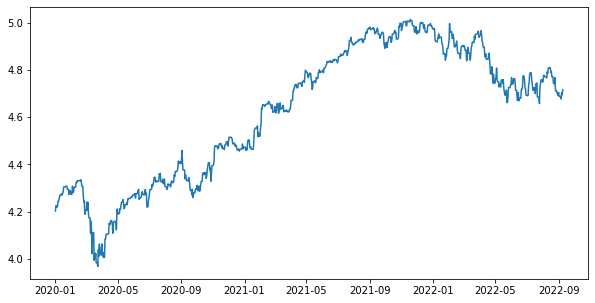

In [19]:
log_close = goog_df['log Close'].dropna()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(log_close)

stationarity(log_close)

As you see, log close is not stationarity; So let's apply diff function and check it again

<AxesSubplot:xlabel='Date'>

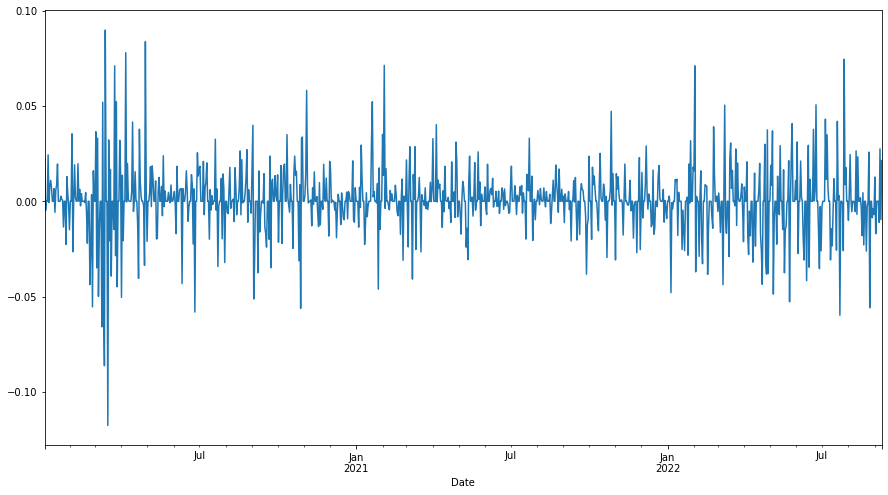

In [20]:
diff_1_logclose = goog_df['log Close'].diff().dropna()
diff_1_logclose.plot(figsize=(15,8))

Test Statistic: -8.022157606268237
P-Value: 2.0624962814790945e-12
Stationary


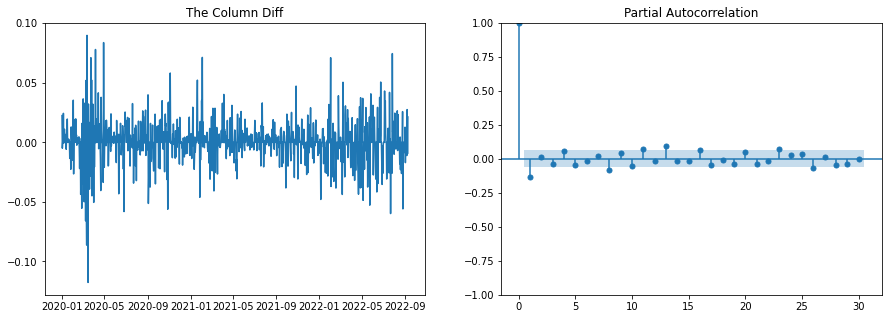

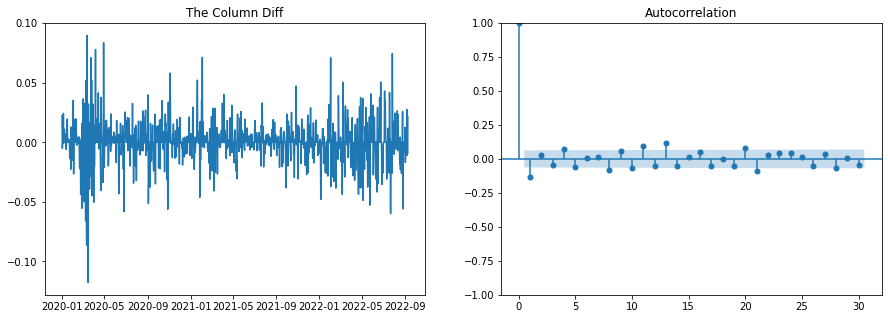

In [21]:
stationarity(diff_1_logclose)
pacf(diff_1_logclose)
acf(diff_1_logclose)

You can see log price is stationarity after once differencing. So d = 1

According to acf and pacf plots, for our arima model it's better to set P=1 and Q=1

Root Mean Squared Error:  0.06740965122115374
Mean Absolute Error:  0.056271316753052976


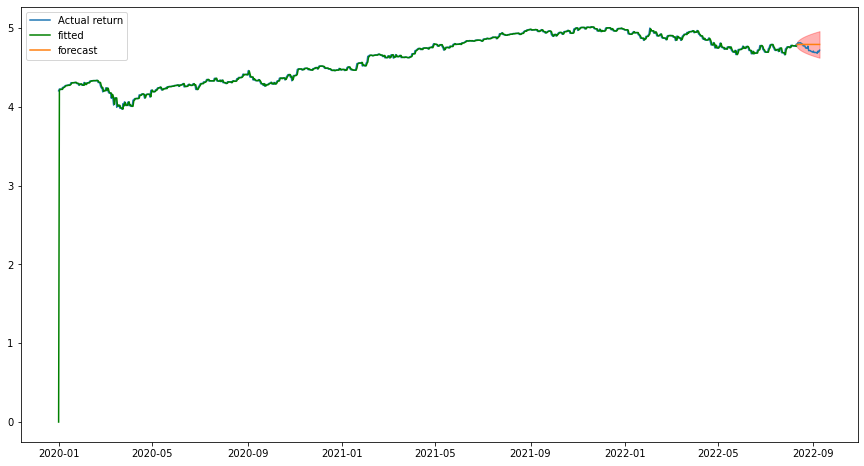

In [22]:
rmse, mae = arima_train_and_plot(goog_df, 'log Close', Ntest=30, p=1, d=1, q=1)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

**Auto-Arima ARIMA on Log of Prices(Close values)**

In [23]:
d_val = ndiffs(goog_df['log Close'], test='adf')
print('Arima D-value:', d_val)

Arima D-value: 1


In [24]:
#splitting the data to train and test sets based on Ntest value
#last 30 days
Ntest = 30
train = goog_df.iloc[:-Ntest]
test = goog_df.iloc[-Ntest:]
train_idx = goog_df.index <= train.index[-1]
test_idx = goog_df.index > train.index[-1]

#Define auto-arima to find best model
model = pm.auto_arima(train['log Close'],
                      d = d_val,
                      start_p = 0,
                      max_p = 15,
                      start_q = 0,
                      max_q = 15,
                      stepwise=False,
                      max_order=30,
                      trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=-4988.721, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=-5002.230, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=-5000.440, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=-4999.437, Time=1.40 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=-5000.190, Time=1.96 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=-5002.842, Time=1.76 sec
 ARIMA(0,1,6)(0,0,0)[1] intercept   : AIC=-5001.433, Time=3.39 sec
 ARIMA(0,1,7)(0,0,0)[1] intercept   : AIC=-5000.373, Time=4.76 sec
 ARIMA(0,1,8)(0,0,0)[1] intercept   : AIC=-4999.803, Time=2.48 sec
 ARIMA(0,1,9)(0,0,0)[1] intercept   : AIC=-4998.190, Time=3.58 sec
 ARIMA(0,1,10)(0,0,0)[1] intercept   : AIC=-4997.432, Time=6.33 sec
 ARIMA(0,1,11)(0,0,0)[1] intercept   : AIC=-5000.599, Time=9.07 sec
 ARIMA(0,1,12)(0,0,0)[1] intercept   : AIC=-4998.996, Time=9.42 sec
 ARIMA(0,1,13)(0,0,0)[1] intercept   : AIC=-5009.240, Time=12.59 sec
 ARIMA(0,1,14)(0,0,0)[1] intercept   : AIC=-5011.391, Tim

In [25]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (6, 1, 8),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 1),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

Root Mean Squared Error:  0.07741700846210496
Mean Absolute Error:  0.06377635193354209


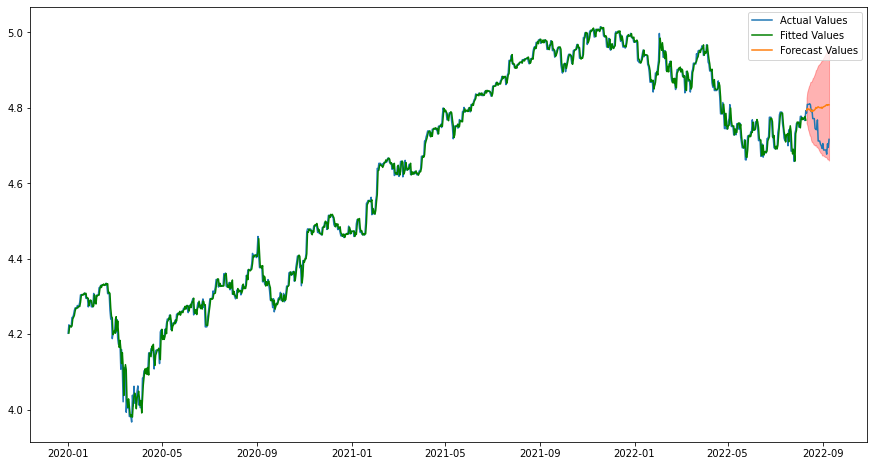

In [26]:
rmse, mae = plot_result(model, goog_df, 'log Close', Ntest=30)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

# APPLE

All steps are like google section:
1. Preprocessing
2. Classic ARIMA: classic methods like differencing and check stationarity status to   select D-value (I), PACF plot for P-value (AR), ACF plot for Q-value (MA)
3. Auto ARIMA: use pmdarima library to find the best arima model
4. plotting the results and calcuting RMSE and MAE

**1. Preprocessing**

In [27]:
appl_df = df[df['Symbol'] == 'AAPL']
appl_df = appl_df.asfreq('d')
appl_df = appl_df.fillna(method='ffill')
appl_df

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2009-12-31,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,AAPL,6.572423,7.643214,7.660714,7.585000,7.622500,493729600.0
...,...,...,...,...,...,...,...
2022-09-05,AAPL,155.809998,155.809998,160.360001,154.970001,159.750000,76905200.0
2022-09-06,AAPL,154.529999,154.529999,157.089996,153.690002,156.470001,73714800.0
2022-09-07,AAPL,155.960007,155.960007,156.669998,153.610001,154.820007,87449600.0


In [28]:
appl_df = appl_df[appl_df.index >= '2020-01-01']
appl_df

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-01,AAPL,72.552094,73.412498,73.419998,72.379997,72.482498,100805600.0
2020-01-02,AAPL,74.207466,75.087502,75.150002,73.797501,74.059998,135480400.0
2020-01-03,AAPL,73.486023,74.357498,75.144997,74.125000,74.287498,146322800.0
2020-01-04,AAPL,73.486023,74.357498,75.144997,74.125000,74.287498,146322800.0
2020-01-05,AAPL,73.486023,74.357498,75.144997,74.125000,74.287498,146322800.0
...,...,...,...,...,...,...,...
2022-09-05,AAPL,155.809998,155.809998,160.360001,154.970001,159.750000,76905200.0
2022-09-06,AAPL,154.529999,154.529999,157.089996,153.690002,156.470001,73714800.0
2022-09-07,AAPL,155.960007,155.960007,156.669998,153.610001,154.820007,87449600.0


**2. Classic ARIMA**

check stationarity status of apple close prices.

Test Statistic: -1.5161163368261255
P-Value: 0.5255242880756913
Non-Stationary


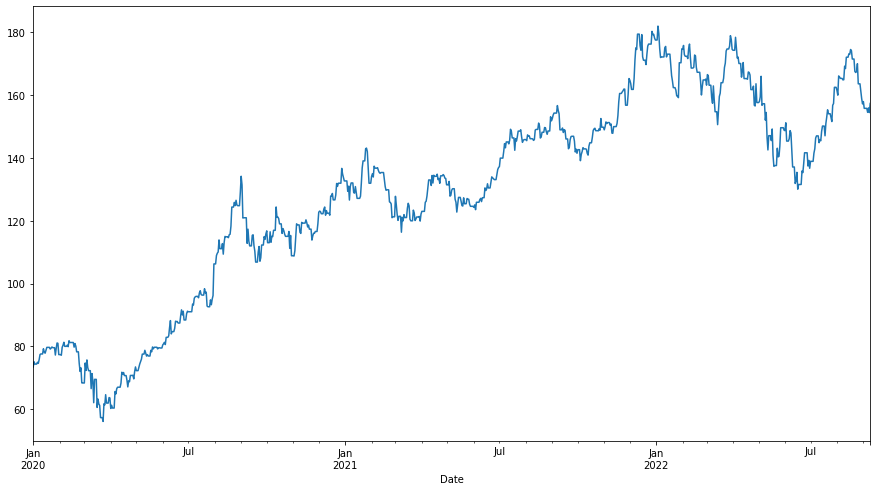

In [29]:
appl_df['Close'].plot(figsize=(15,8))

stationarity(appl_df['Close'])

Check stationarity status for once differencing of Close values

Test Statistic: -33.834872181539836
P-Value: 0.0
Stationary


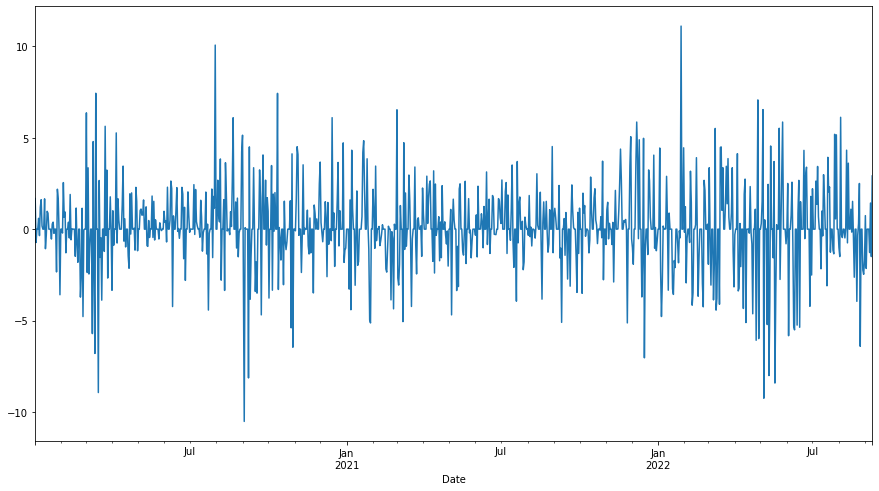

In [30]:
diff_1_close = appl_df['Close'].diff().dropna()
diff_1_close.plot(figsize=(15,8))

stationarity(diff_1_close)

Trying to choose best P and Q values for ARIMA model using PACF and ACF plots.

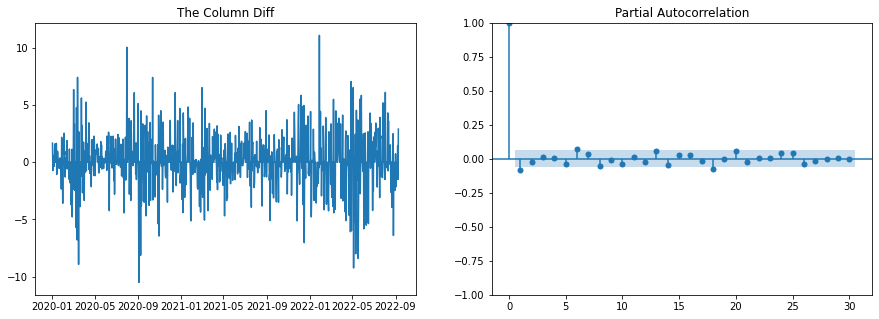

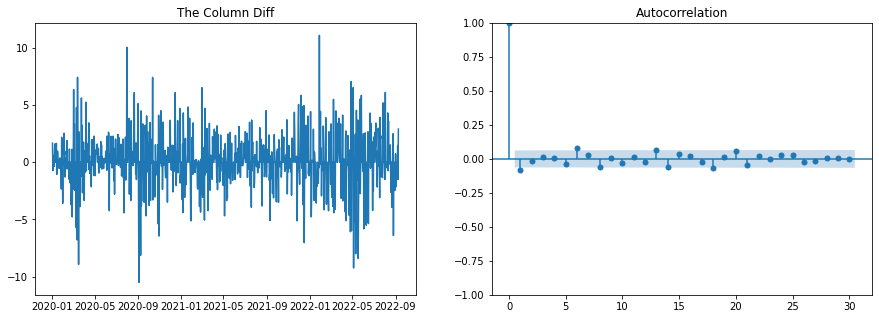

In [31]:
pacf(diff_1_close)
acf(diff_1_close)

You can see log price is stationarity after once differencing. So d = 1

According to acf and pacf plots, for our arima model it's better to set P=0 and Q=0

Root Mean Squared Error:  8.449563942928672
Mean Absolute Error:  6.90066884358724


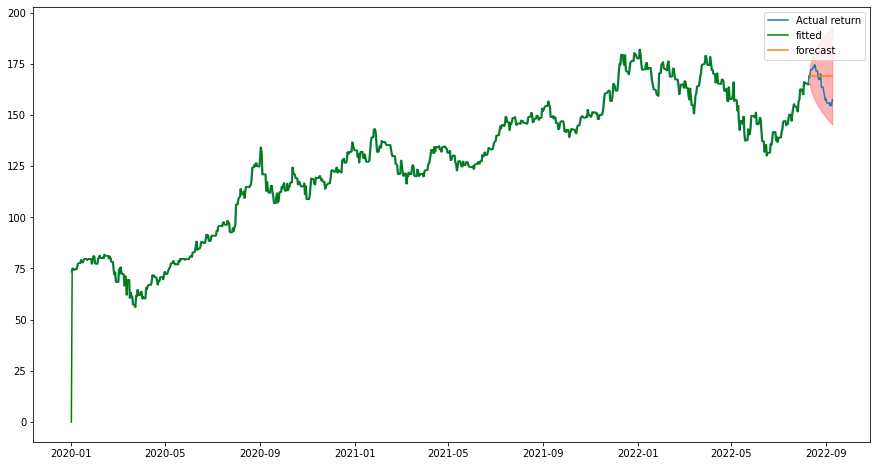

In [32]:
rmse, mae = arima_train_and_plot(appl_df, 'Close', Ntest=30, p=0, d=1, q=0)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

**3. Auto ARIMA**

In [33]:
#find D-value (diffrencing order) for auto-arima model
d_val = ndiffs(appl_df['Close'], test='adf')
print('Arima D-value:', d_val)

Arima D-value: 1


In [34]:
#splitting the data to train and test sets based on Ntest value
#last 30 days
Ntest = 30
train = appl_df.iloc[:-Ntest]
test = appl_df.iloc[-Ntest:]
train_idx = appl_df.index <= train.index[-1]
test_idx = appl_df.index > train.index[-1]

#Define auto-arima to find best model
model = pm.auto_arima(train['Close'],
                      d = d_val,
                      start_p = 0,
                      max_p = 15,
                      start_q = 0,
                      max_q = 15,
                      stepwise=False,
                      max_order=30,
                      trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=4225.209, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=4221.294, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=4222.801, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=4224.745, Time=0.51 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=4226.699, Time=0.70 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=4228.150, Time=0.94 sec
 ARIMA(0,1,6)(0,0,0)[1] intercept   : AIC=4223.445, Time=0.83 sec
 ARIMA(0,1,7)(0,0,0)[1] intercept   : AIC=4225.419, Time=1.63 sec
 ARIMA(0,1,8)(0,0,0)[1] intercept   : AIC=4224.237, Time=1.72 sec
 ARIMA(0,1,9)(0,0,0)[1] intercept   : AIC=4226.009, Time=1.98 sec
 ARIMA(0,1,10)(0,0,0)[1] intercept   : AIC=4226.982, Time=1.93 sec
 ARIMA(0,1,11)(0,0,0)[1] intercept   : AIC=4228.121, Time=2.58 sec
 ARIMA(0,1,12)(0,0,0)[1] intercept   : AIC=4230.114, Time=2.42 sec
 ARIMA(0,1,13)(0,0,0)[1] intercept   : AIC=4230.118, Time=3.15 sec
 ARIMA(0,1,14)(0,0,0)[1] intercept   : AIC=4229.076, Time=3.09 sec
 ARIM

In [35]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (2, 1, 3),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 1),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

Root Mean Squared Error:  9.787150135688966
Mean Absolute Error:  7.830167463173593


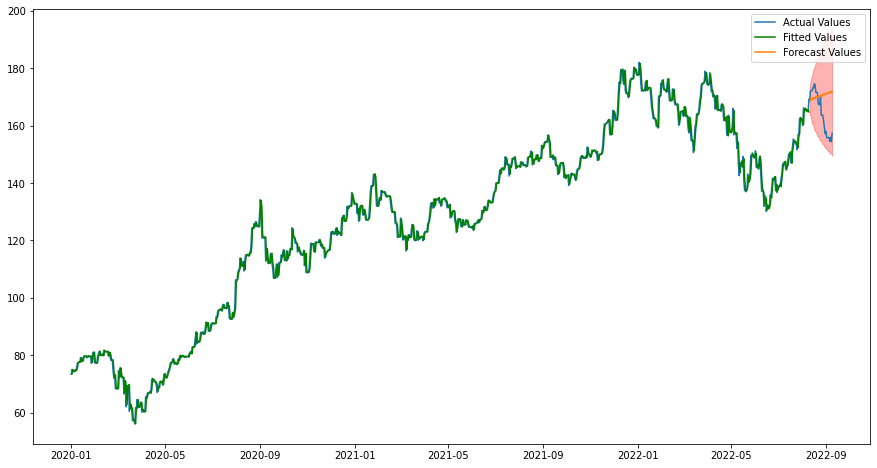

In [36]:
rmse, mae = plot_result(model, appl_df, 'Close', Ntest=30)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

If you compare the metrics result of classic arima and auto arima, you can see classic arima do its job a bit better than auto arima in this case!

# MICROSOFT

All steps are like previous section:
1. Preprocessing
2. Classic ARIMA: classic methods like differencing and check stationarity status to   select D-value (I), PACF plot for P-value (AR), ACF plot for Q-value (MA)
3. Auto ARIMA: use pmdarima library to find the best arima model
4. plotting the results and calcuting RMSE and MAE

**1. Preprocessing**

In [37]:
msft_df = df[df['Symbol'] == 'AAPL']
msft_df = msft_df.asfreq('d')
msft_df = msft_df.fillna(method='ffill')
msft_df

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2009-12-31,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,AAPL,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,AAPL,6.572423,7.643214,7.660714,7.585000,7.622500,493729600.0
...,...,...,...,...,...,...,...
2022-09-05,AAPL,155.809998,155.809998,160.360001,154.970001,159.750000,76905200.0
2022-09-06,AAPL,154.529999,154.529999,157.089996,153.690002,156.470001,73714800.0
2022-09-07,AAPL,155.960007,155.960007,156.669998,153.610001,154.820007,87449600.0


In [38]:
msft_df = msft_df[msft_df.index >= '2020-01-01']
msft_df

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-01,AAPL,72.552094,73.412498,73.419998,72.379997,72.482498,100805600.0
2020-01-02,AAPL,74.207466,75.087502,75.150002,73.797501,74.059998,135480400.0
2020-01-03,AAPL,73.486023,74.357498,75.144997,74.125000,74.287498,146322800.0
2020-01-04,AAPL,73.486023,74.357498,75.144997,74.125000,74.287498,146322800.0
2020-01-05,AAPL,73.486023,74.357498,75.144997,74.125000,74.287498,146322800.0
...,...,...,...,...,...,...,...
2022-09-05,AAPL,155.809998,155.809998,160.360001,154.970001,159.750000,76905200.0
2022-09-06,AAPL,154.529999,154.529999,157.089996,153.690002,156.470001,73714800.0
2022-09-07,AAPL,155.960007,155.960007,156.669998,153.610001,154.820007,87449600.0


**2. Classic ARIMA**

check stationarity status of Microsoft close prices.

Test Statistic: -1.5161163368261255
P-Value: 0.5255242880756913
Non-Stationary


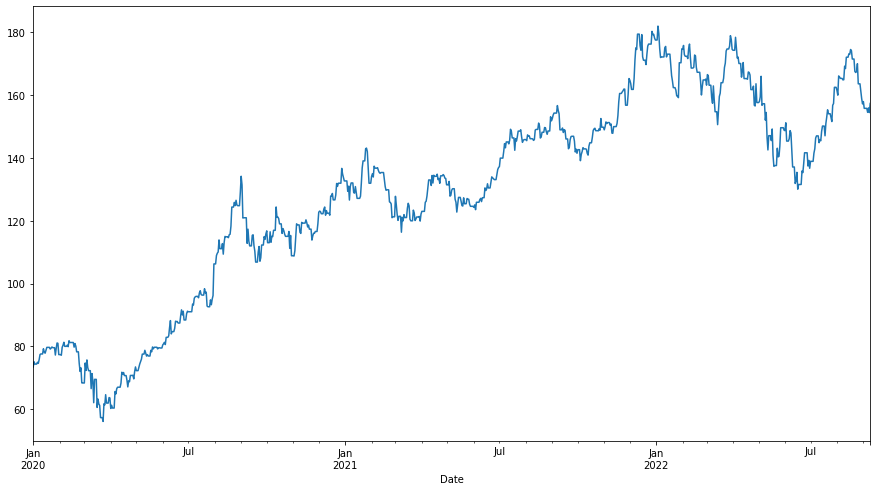

In [39]:
msft_df['Close'].plot(figsize=(15,8))

stationarity(msft_df['Close'])

Check stationarity status for once differencing of Close values

Test Statistic: -33.834872181539836
P-Value: 0.0
Stationary


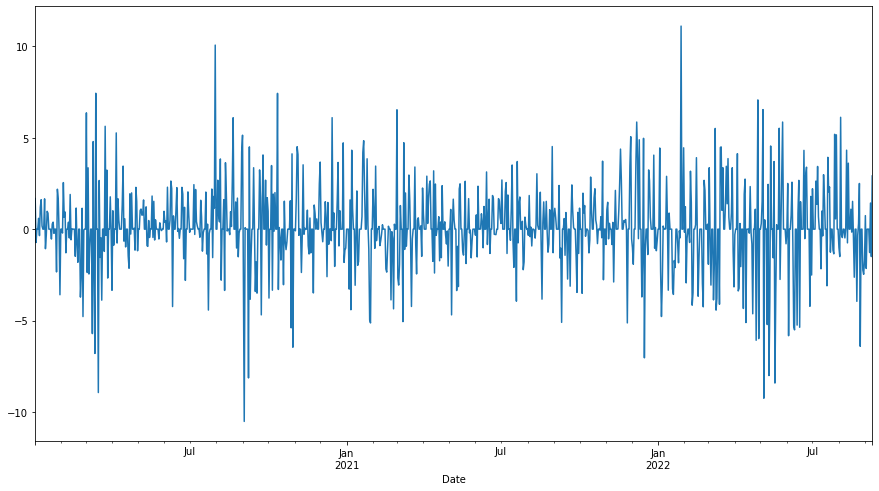

In [40]:
diff_1_close = msft_df['Close'].diff().dropna()
diff_1_close.plot(figsize=(15,8))

stationarity(diff_1_close)

Trying to choose best P and Q values for ARIMA model using PACF and ACF plots.

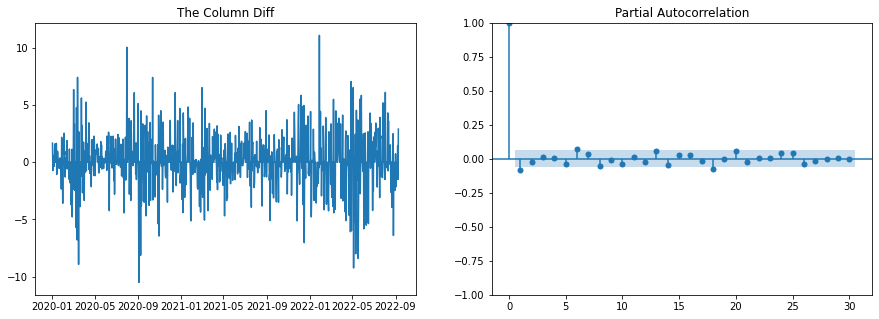

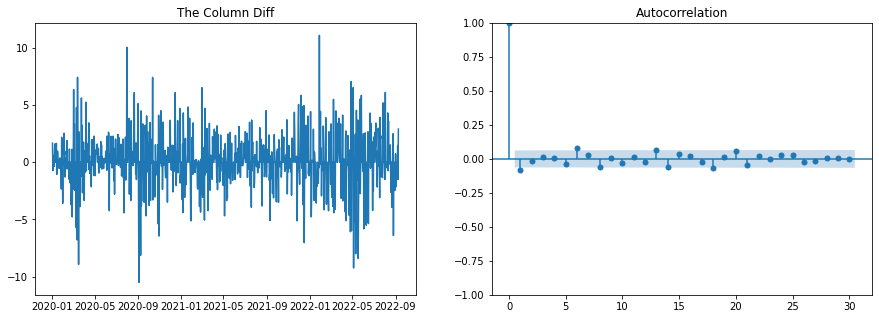

In [41]:
pacf(diff_1_close)
acf(diff_1_close)

You can see log price is stationarity after once differencing. So d = 1

According to acf and pacf plots, for our arima model it's better to set P=0 and Q=0

Root Mean Squared Error:  8.449563942928672
Mean Absolute Error:  6.90066884358724


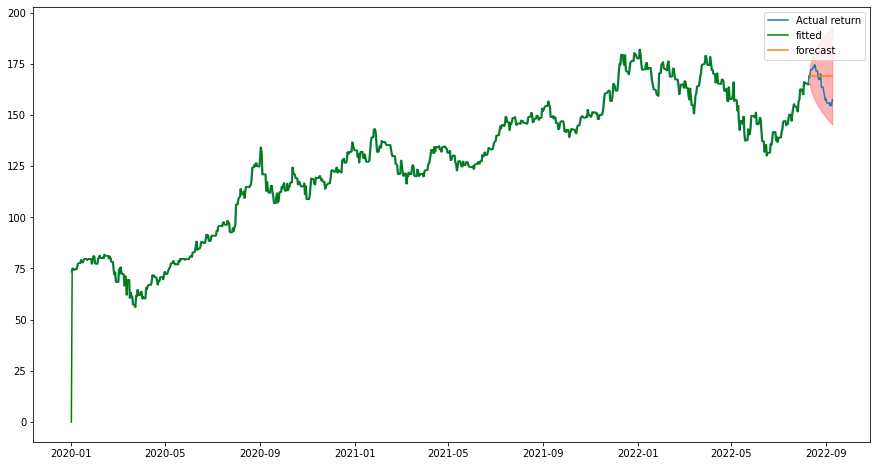

In [42]:
rmse, mae = arima_train_and_plot(msft_df, 'Close', Ntest=30, p=0, d=1, q=0)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

**3. Auto ARIMA**

In [43]:
#find D-value (diffrencing order) for auto-arima model
d_val = ndiffs(msft_df['Close'], test='adf')
print('Arima D-value:', d_val)

Arima D-value: 1


In [44]:
#splitting the data to train and test sets based on Ntest value
#last 30 days
Ntest = 30
train = msft_df.iloc[:-Ntest]
test = msft_df.iloc[-Ntest:]
train_idx = msft_df.index <= train.index[-1]
test_idx = msft_df.index > train.index[-1]

#Define auto-arima to find best model
model = pm.auto_arima(train['Close'],
                      d = d_val,
                      start_p = 0,
                      max_p = 15,
                      start_q = 0,
                      max_q = 15,
                      stepwise=False,
                      max_order=30,
                      trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=4225.209, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=4221.294, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=4222.801, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=4224.745, Time=0.50 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=4226.699, Time=0.71 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=4228.150, Time=0.90 sec
 ARIMA(0,1,6)(0,0,0)[1] intercept   : AIC=4223.445, Time=0.83 sec
 ARIMA(0,1,7)(0,0,0)[1] intercept   : AIC=4225.419, Time=1.19 sec
 ARIMA(0,1,8)(0,0,0)[1] intercept   : AIC=4224.237, Time=1.67 sec
 ARIMA(0,1,9)(0,0,0)[1] intercept   : AIC=4226.009, Time=2.27 sec
 ARIMA(0,1,10)(0,0,0)[1] intercept   : AIC=4226.982, Time=2.32 sec
 ARIMA(0,1,11)(0,0,0)[1] intercept   : AIC=4228.121, Time=2.61 sec
 ARIMA(0,1,12)(0,0,0)[1] intercept   : AIC=4230.114, Time=2.44 sec
 ARIMA(0,1,13)(0,0,0)[1] intercept   : AIC=4230.118, Time=3.18 sec
 ARIMA(0,1,14)(0,0,0)[1] intercept   : AIC=4229.076, Time=3.11 sec
 ARIM

In [45]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (2, 1, 3),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 1),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

Root Mean Squared Error:  9.787150135688966
Mean Absolute Error:  7.830167463173593


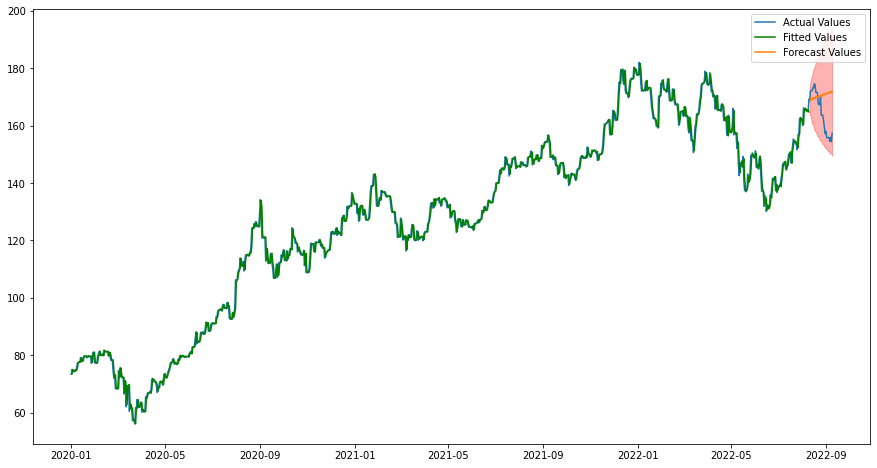

In [46]:
rmse, mae = plot_result(model, msft_df, 'Close', Ntest=30)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

If you compare the metrics result of classic arima and auto arima, you can see classic arima do its job a bit better than auto arima in this case!

# Berkshire Hathaway

All steps are like previous section:

1. Preprocessing
2. Classic ARIMA: classic methods like differencing and check stationarity status to select D-value (I), PACF plot for P-value (AR), ACF plot for Q-value (MA)
3. Auto ARIMA: use pmdarima library to find the best arima model
4. plotting the results and calcuting RMSE and MAE

**1. Preprocessing**

In [47]:
brkb_df = df[df['Symbol'] == 'BRK-B']
brkb_df = brkb_df.asfreq('d')
brkb_df = brkb_df.fillna(method='ffill')
brkb_df

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2009-12-31,BRK-B,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01,BRK-B,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,BRK-B,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,BRK-B,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,BRK-B,66.220001,66.220001,66.500000,65.919998,66.000000,1575000.0
...,...,...,...,...,...,...,...
2022-09-05,BRK-B,277.670013,277.670013,285.420013,276.369995,284.839996,3793600.0
2022-09-06,BRK-B,276.589996,276.589996,279.489990,275.359985,278.010010,4362900.0
2022-09-07,BRK-B,281.040009,281.040009,281.739990,275.420013,275.739990,3509900.0


In [48]:
brkb_df = brkb_df[brkb_df.index >= '2020-01-01']
brkb_df

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2020-01-01,BRK-B,226.500000,226.500000,226.720001,225.139999,226.160004,3145200.0
2020-01-02,BRK-B,228.389999,228.389999,228.389999,226.710007,227.509995,3764000.0
2020-01-03,BRK-B,226.179993,226.179993,227.429993,225.479996,225.690002,3023900.0
2020-01-04,BRK-B,226.179993,226.179993,227.429993,225.479996,225.690002,3023900.0
2020-01-05,BRK-B,226.179993,226.179993,227.429993,225.479996,225.690002,3023900.0
...,...,...,...,...,...,...,...
2022-09-05,BRK-B,277.670013,277.670013,285.420013,276.369995,284.839996,3793600.0
2022-09-06,BRK-B,276.589996,276.589996,279.489990,275.359985,278.010010,4362900.0
2022-09-07,BRK-B,281.040009,281.040009,281.739990,275.420013,275.739990,3509900.0


**2. Classic ARIMA**

check stationarity status of Berkshire Hathaway close prices.

Test Statistic: -1.1372961570688513
P-Value: 0.6999718643087282
Non-Stationary


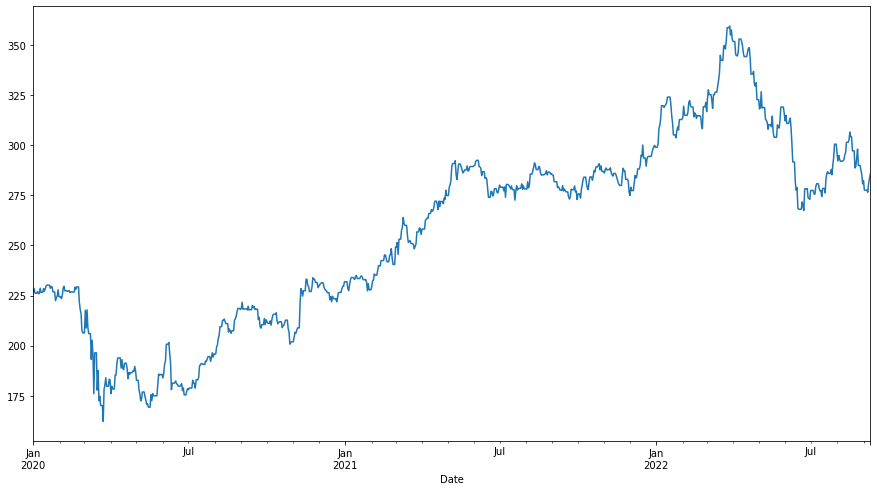

In [49]:
brkb_df['Close'].plot(figsize=(15,8))

stationarity(brkb_df['Close'])

Check stationarity status for once differencing of Close values

Test Statistic: -8.35180067010684
P-Value: 2.9808802351122547e-13
Stationary


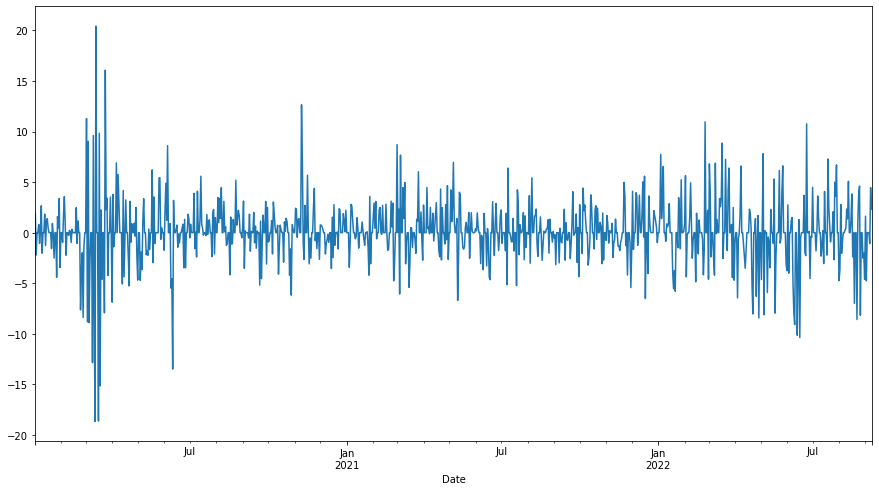

In [50]:
diff_1_close = brkb_df['Close'].diff().dropna()
diff_1_close.plot(figsize=(15,8))

stationarity(diff_1_close)

Trying to choose best P and Q values for ARIMA model using PACF and ACF plots.

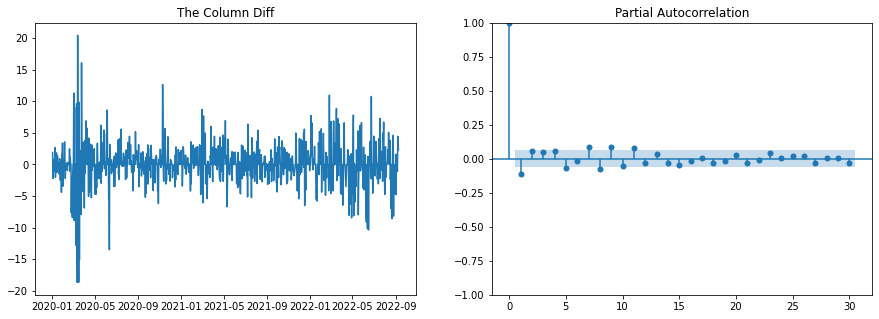

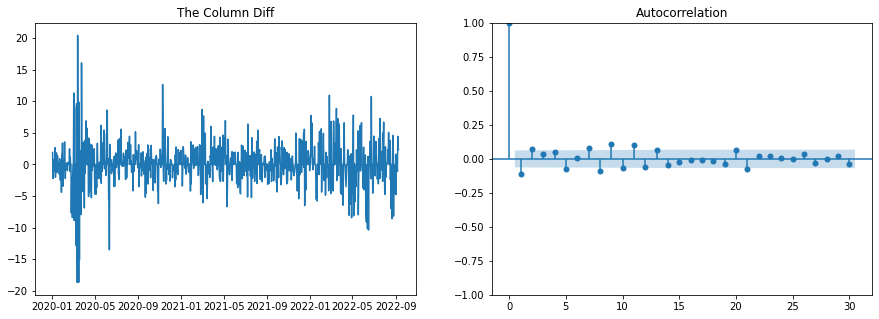

In [51]:
pacf(diff_1_close)
acf(diff_1_close)

You can see log price is stationarity after once differencing. So d = 1

According to acf and pacf plots, for our arima model it's better to set P=1 and Q=1

Root Mean Squared Error:  10.202472920329908
Mean Absolute Error:  8.785198896359667


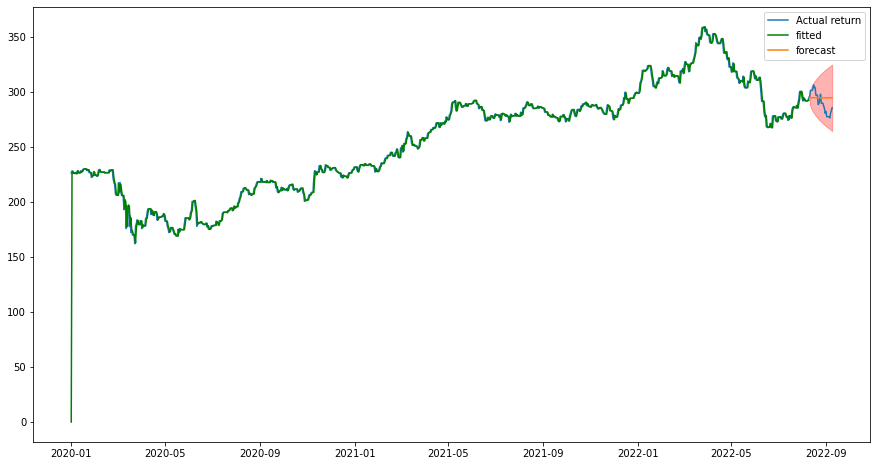

In [57]:
rmse, mae = arima_train_and_plot(brkb_df, 'Close', Ntest=30, p=1, d=1, q=1)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

**3. Auto ARIMA**

In [53]:
#find D-value (diffrencing order) for auto-arima model
d_val = ndiffs(brkb_df['Close'], test='adf')
print('Arima D-value:', d_val)

Arima D-value: 1


In [54]:
#splitting the data to train and test sets based on Ntest value
#last 30 days
Ntest = 30
train = brkb_df.iloc[:-Ntest]
test = brkb_df.iloc[-Ntest:]
train_idx = brkb_df.index <= train.index[-1]
test_idx = brkb_df.index > train.index[-1]

#Define auto-arima to find best model
model = pm.auto_arima(train['Close'],
                      d = d_val,
                      start_p = 0,
                      max_p = 15,
                      start_q = 0,
                      max_q = 15,
                      stepwise=False,
                      max_order=30,
                      trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=4827.404, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=4819.006, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=4814.910, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=4814.443, Time=0.50 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=4816.164, Time=0.86 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=4811.943, Time=0.85 sec
 ARIMA(0,1,6)(0,0,0)[1] intercept   : AIC=4810.090, Time=1.26 sec
 ARIMA(0,1,7)(0,0,0)[1] intercept   : AIC=4811.059, Time=1.66 sec
 ARIMA(0,1,8)(0,0,0)[1] intercept   : AIC=4809.795, Time=1.43 sec
 ARIMA(0,1,9)(0,0,0)[1] intercept   : AIC=4804.430, Time=1.68 sec
 ARIMA(0,1,10)(0,0,0)[1] intercept   : AIC=4805.152, Time=1.91 sec
 ARIMA(0,1,11)(0,0,0)[1] intercept   : AIC=4799.972, Time=2.69 sec
 ARIMA(0,1,12)(0,0,0)[1] intercept   : AIC=4801.140, Time=3.36 sec
 ARIMA(0,1,13)(0,0,0)[1] intercept   : AIC=4801.441, Time=4.37 sec
 ARIMA(0,1,14)(0,0,0)[1] intercept   : AIC=4800.463, Time=3.51 sec
 ARIM

In [55]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (6, 1, 2),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 1),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

Root Mean Squared Error:  10.270260873438506
Mean Absolute Error:  8.816328938802084


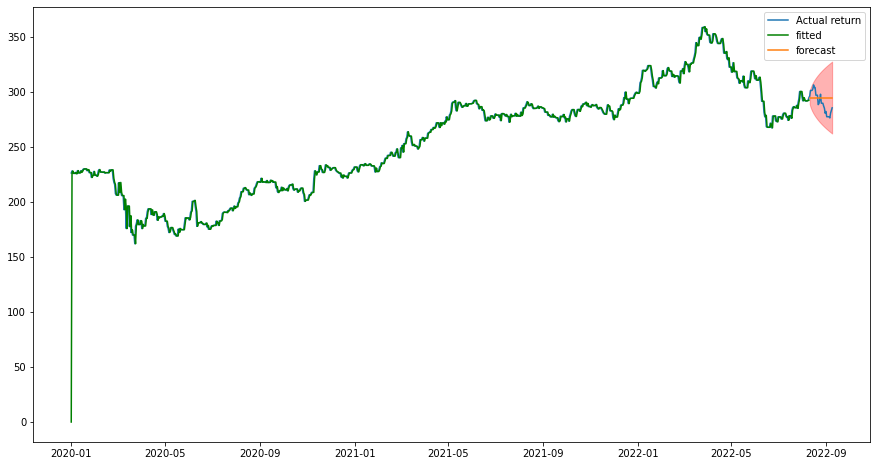

In [56]:
rmse, mae = arima_train_and_plot(brkb_df, 'Close', Ntest=30, p=0, d=1, q=0)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)

If you compare the metrics result of classic arima and auto arima, almost you can see both classic and auto arima models are same!

# Results

In this notebook, we tried to predict the stocks of four big companies which are Google, Apple, Microsoft and Berkshire Hathaway. For this purpose, we used classic and auto Arima models but we observed that the results of both are almost the same. Most of the models that we got in the classic Arima section, are ARIMA(0,1,0) and it's nothing but **RANDOM WALK** :)

In fact, it can be said that if you are thinking of getting rich by predicting stocks in this way, don't waste your time! You might think that other models like LSTM work better, but in practice you will realize that it is a waste of time too; Because most of the time the market follows a random walk!

GOOD LUCK :)